<a href="https://colab.research.google.com/github/Nov05/Lambda-School-Data-Science-Precourse/blob/master/LSDS_Intro_Assignment_2_Intro_to_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1) Copy the notebook to your google account.

## 2) Import the pandas library and alias it as "pd".

In [0]:
##### Your Code Here #####
import pandas as pd
from numpy import median

## 3) Read in the CSV dataset that is found at the following URL:
[DATASET HERE](https://raw.githubusercontent.com/ryanleeallred/datasets/master/messy-data.csv)


In [0]:
##### Your Code Here #####
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/messy-data.csv')

## 4) Print out the shape as well as the first 5 rows of the dataframe.

In [0]:
##### Your Code Here #####
df.head()

,alpha,beta,gamma,delta,epsilon,zeta,eta
0,2,48,12,240,3.0,Yes,AZ
1,3,46,18,230,5.0,NaN,VT
2,4,44,24,220,7.0,No,PA
3,5,42,30,210,9.0,Yes,OK
4,6,44,36,220,11.0,Yes,MD


## 5) Print out the datatypes of the dataframe columns (dataset features).

In [0]:
##### Your Code Here #####
df.columns

Index(['alpha', 'beta', 'gamma', 'delta', 'epsilon', 'zeta', 'eta'], dtype='object')

## 6) Print out the summary statistics of the numeric values of your dataset i.e. min, max, mean, standard deviation, etc.

In [0]:
##### Your Code Here #####
df.describe()

,alpha,beta,gamma,delta,epsilon
count,165.000000,165.000000,165.000000,165.000000,141.000000
mean,46.169697,17.921212,277.018182,89.606061,164.794326
std,24.371521,17.769180,146.229125,88.845900,96.430843
min,2.000000,-11.000000,12.000000,-55.000000,3.000000
25%,28.000000,7.000000,168.000000,35.000000,83.000000
50%,44.000000,15.000000,264.000000,75.000000,163.000000
75%,65.000000,32.000000,390.000000,160.000000,247.000000
max,85.000000,50.000000,510.000000,250.000000,331.000000


## 6) Clean all NaN values from the dataset.

Feel free to add code cells as needed.

In [0]:
##### Your Code Here #####
df_isnull = df.isnull()
df_isnull.sum()

alpha       0
beta        0
gamma       0
delta       0
epsilon    24
zeta       19
eta         0
dtype: int64

In [0]:
epsilon_median = df.median().epsilon
epsilon_median

163.0

In [0]:
df.epsilon = df.epsilon.fillna(epsilon_median)
df.epsilon.describe()

count    165.000000
mean     164.533333
std       89.098228
min        3.000000
25%       95.000000
50%      163.000000
75%      233.000000
max      331.000000
Name: epsilon, dtype: float64

In [0]:
df.zeta = df.zeta.fillna(method='ffill')
df.zeta.describe()

count     165
unique      2
top       Yes
freq       85
Name: zeta, dtype: object

## 6.1) Describe how you addressed the NaN values and give an explanation justifying your decision.

In [0]:
##### Your Code Here #####
# There are two columns that have NAs, df.epsilon and df.zeta.
# 1. df.epsilon is a numeric column, so I decided to fill the NAs with the column median.
# 2. df.zata is a character column, so I decided to fill the NAs with the method "ffill" (forward filling).

## 7) Create scatter plots using Matplotlib. Can you find any interesting relationships in the data? Be sure to label your axis and to give your graphs a title.

Screenshot cool graphs that you create and share them with the slack channel. 

Don't forget to import matplotlib before trying to use it.

In [0]:
##### Your Code Here #####
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Sample Count')

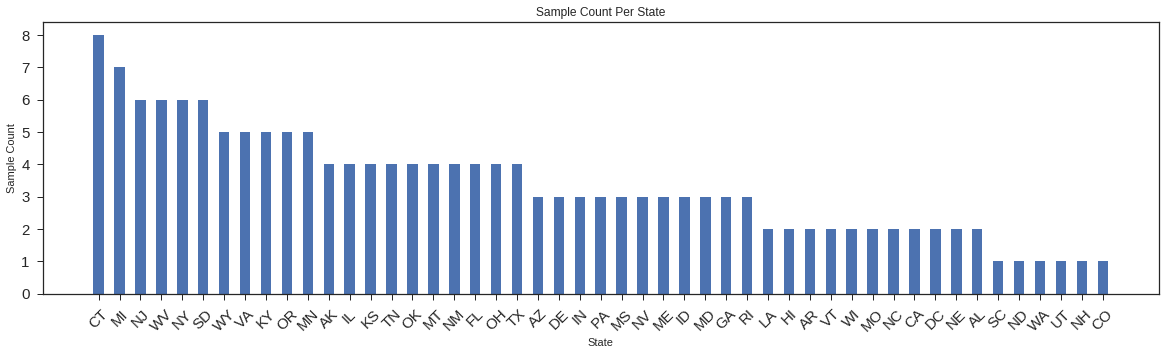

In [0]:
df_counts = df.eta.value_counts().reset_index()
df_counts.columns = ['state', 'cnt']

plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
plt.tick_params(labelsize=15)

plt.bar(df_counts.state, df_counts.cnt, width=0.5)
plt.title('Sample Count Per State')
plt.xlabel('State')
plt.ylabel('Sample Count')

Text(0.5, 0.98, 'Scatterplot Matrix')

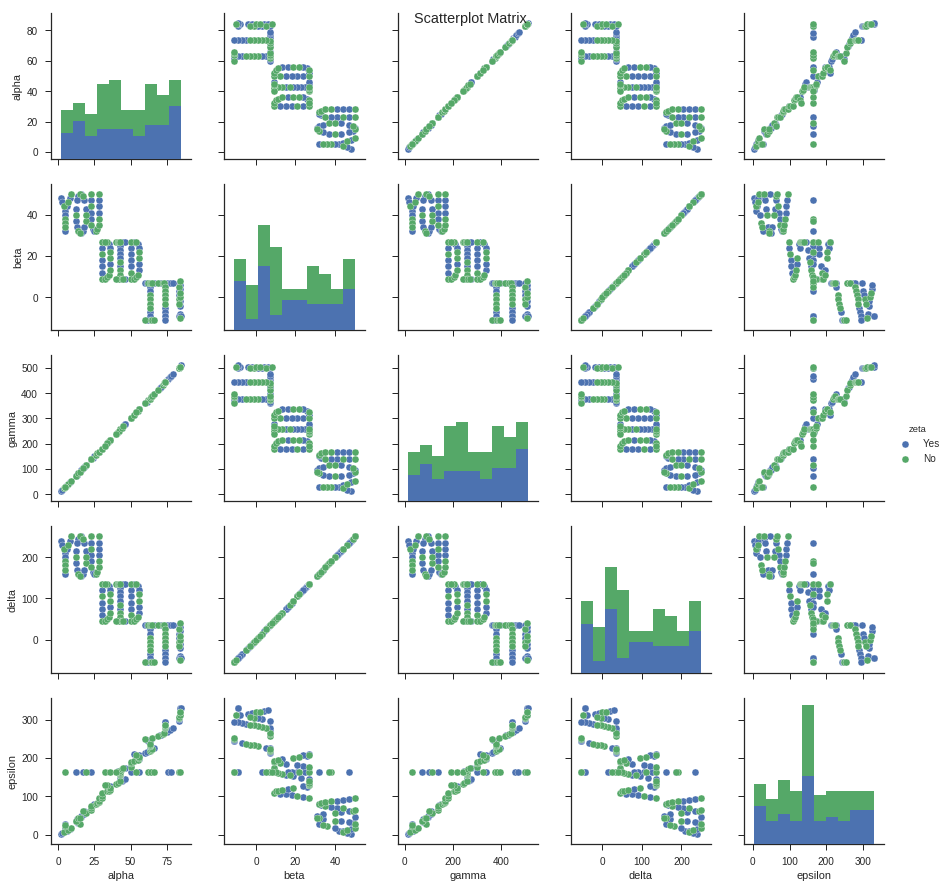

In [0]:
# scatterplot matrix
sns.set(style="ticks")
sns.pairplot(df.drop(['eta'], axis=1), hue="zeta").fig.suptitle("Scatterplot Matrix")

## 8) STRETCH GOAL (Extra Credit)

Machine Learning algorithms don't do well with categorical values that are represented by strings. In order to have this dataset completely cleaned we need to transform the categorical variables that are represented as strings into numeric categorical variables

- **Turn all categorical features (columns) into numeric features**

Hints:

[Scikit-Learn One-Hot-Encoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

[Pandas Docs - Working with Categorical Data](https://pandas.pydata.org/pandas-docs/stable/categorical.html)

[Guide to Encoding Categorical Variables in Python](http://pbpython.com/categorical-encoding.html)

In [0]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [0]:
# all categorical features
df[['zeta', 'eta']].head()

,zeta,eta
0,Yes,AZ
1,Yes,VT
2,No,PA
3,Yes,OK
4,Yes,MD


In [0]:
# https://www.ritchieng.com/machinelearning-one-hot-encoding/
# TODO: create a LabelEncoder object and fit it to each categorical feature

# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = LabelEncoder()

# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
df_label = df[['zeta', 'eta']].apply(le.fit_transform)
df_label.head()

,zeta,eta
0,1,3
1,1,44
2,0,36
3,1,34
4,1,18


In [0]:
# TODO: create a OneHotEncoder object, and fit it to all of X

# 1. INSTANTIATE
enc = OneHotEncoder()

# 2. FIT
enc.fit(df_label)

# 3. Transform
arr_onehot = enc.transform(df_label).toarray()
arr_onehot.shape

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(165, 51)

In [0]:
arr_onehot

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [0]:
df_onehot = pd.DataFrame(arr_onehot, dtype=int)
df_onehot.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
